In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'D:\data sets\bank_marketing_updated_v1.csv',encoding='latin1',skiprows=2)

In [3]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Session- 2, Data Cleaning
Segment- 2, Data Types
There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:

1:Numeric data type: banking dataset: salary, balance, duration and age.
2:Categorical data type: banking dataset: education, job, marital, poutcome and month etc.
3:Ordinal data type: banking dataset: Age group.
4:Time and date type
5:Coordinates type of data: latitude and longitude type.

In [5]:
df=df.drop('customerid',axis=1)

## divide 'jobedu' into job and education categories.

In [6]:
df['job']=df['jobedu'].apply(lambda x:x.split(",")[0])


,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [7]:
df['edu']=df['jobedu'].apply(lambda x:x.split(",")[1])

In [9]:
df=df.drop('jobedu',axis=1)

In [10]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   targeted  45211 non-null  object 
 5   default   45211 non-null  object 
 6   housing   45211 non-null  object 
 7   loan      45211 non-null  object 
 8   contact   45211 non-null  object 
 9   day       45211 non-null  int64  
 10  month     45161 non-null  object 
 11  duration  45211 non-null  object 
 12  campaign  45211 non-null  int64  
 13  pdays     45211 non-null  int64  
 14  previous  45211 non-null  int64  
 15  poutcome  45211 non-null  object 
 16  response  45181 non-null  object 
 17  job       45211 non-null  object 
 18  edu       45211 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usage: 6.6+ MB


In [14]:
df['month']=df['month'].apply(lambda x:str(x).split(",")[0])


## handling missing values

In [16]:
df.isnull().sum()

age         20
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

In [21]:
round(df.isnull().mean()*100,2).sort_values(ascending=False)

response    0.07
age         0.04
month       0.00
job         0.00
poutcome    0.00
previous    0.00
pdays       0.00
campaign    0.00
duration    0.00
day         0.00
salary      0.00
contact     0.00
loan        0.00
housing     0.00
default     0.00
targeted    0.00
marital     0.00
balance     0.00
edu         0.00
dtype: float64

In [17]:
df.shape

(45211, 19)

In [30]:
df=df[~df['age'].isnull()]

In [31]:
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,may,198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,nov,16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,nov,7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,nov,18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,nov,8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


## count the missing values in month column in inp1.

In [50]:
round(df.month.value_counts(normalize=True)*100,0)

may    31.0
jul    15.0
aug    14.0
jun    12.0
nov     9.0
apr     6.0
feb     6.0
jan     3.0
oct     2.0
sep     1.0
mar     1.0
dec     0.0
Name: month, dtype: float64

In [44]:
df.month.mode()[0]

'may'

In [49]:
# fill the missing values with mode value of month in df.
df.loc[df.month=='nan','month']='may'

In [51]:
df.month.value_counts()

may    13790
jul     6885
aug     6235
jun     5333
nov     3967
apr     2930
feb     2646
jan     1402
oct      737
sep      576
mar      476
dec      214
Name: month, dtype: int64

## handling missing values in response column

In [54]:
df.response.unique()

array(['no', 'yes', nan], dtype=object)

In [56]:
#drop the records with response missings in inp1.
df=df[~df.response.isnull()]

In [57]:
df.response.unique()

array(['no', 'yes'], dtype=object)

## handling pdays column.

In [58]:
df.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [61]:
df.loc[df['pdays']<0,'pdays']=np.nan

In [63]:
df['pdays'].describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

## Handling Outliers

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

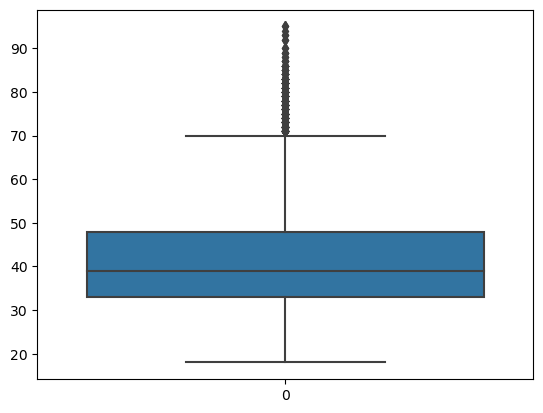

In [92]:
sns.boxplot(df['age'])

<Axes: >

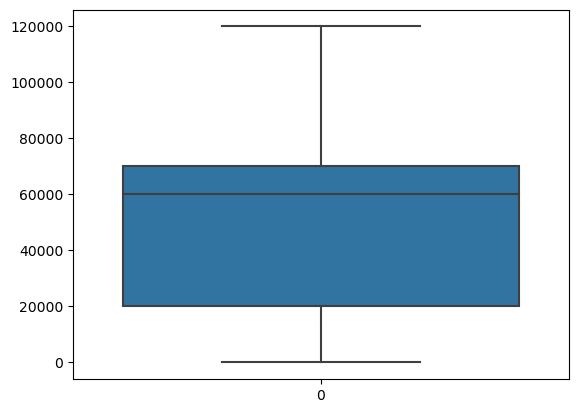

In [95]:
#plot the boxplot of salary variable.
sns.boxplot(df.salary)

In [96]:
#describe the balance variable of inp1.
df.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: >

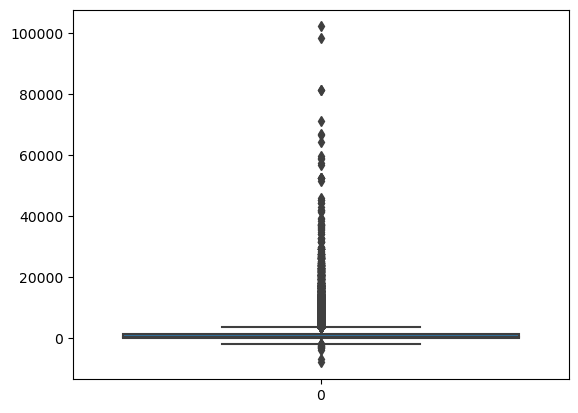

In [97]:
sns.boxplot(df.balance)

In [98]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
df.balance.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

In [107]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
df.duration=df.duration.apply(lambda x:float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]) )

C:\Users\Sony\AppData\Local\Temp\ipykernel_11956\3701508680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.duration=df.duration.apply(lambda x:float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]) )


In [108]:
df.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Univariate Analysis

### Categorical unordered univariate analysis
Type of loan taken by a person = home, personal, auto etc.
Organisation of a person = Sales, marketing, HR etc.
Job category of persone.
Marital status of any one.

In [109]:
#calculate the percentage of each marital status category. 
marital=df.marital.value_counts(normalize=True)*100
marital

married     60.195744
single      28.294325
divorced    11.509931
Name: marital, dtype: float64

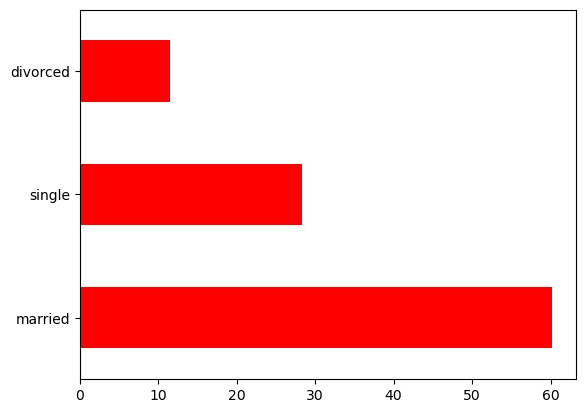

In [110]:
marital.plot.barh(color='r')
plt.show()

### job

In [111]:
#calculate the percentage of each job status category.
job=df.job.value_counts(normalize=True)*100
job

blue-collar      21.527424
management       20.927349
technician       16.804322
admin.           11.436859
services          9.184916
retired           5.008746
self-employed     3.485308
entrepreneur      3.286021
unemployed        2.883019
housemaid         2.741303
student           2.077013
unknown           0.637718
Name: job, dtype: float64

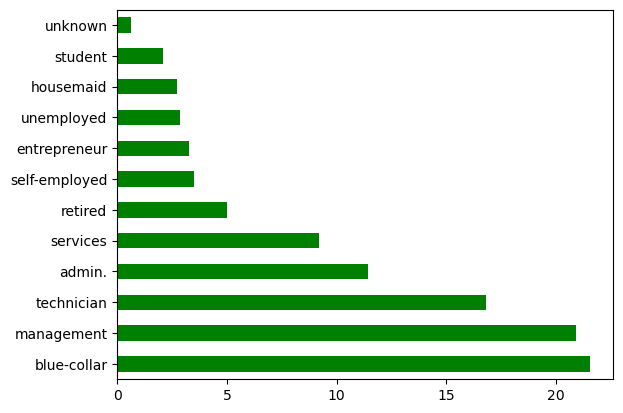

In [112]:
job.plot.barh(color='g')
plt.show()

### Categorical ordered univariate analysis

### Age group= <30, 30-40, 40-50 and so on.
###Month = Jan-Feb-Mar etc.
###Education = primary, secondary and so on.

### Education

In [115]:
education=df.edu.value_counts(normalize=True)*100
education

secondary    51.327473
tertiary     29.419189
primary      15.143597
unknown       4.109741
Name: edu, dtype: float64

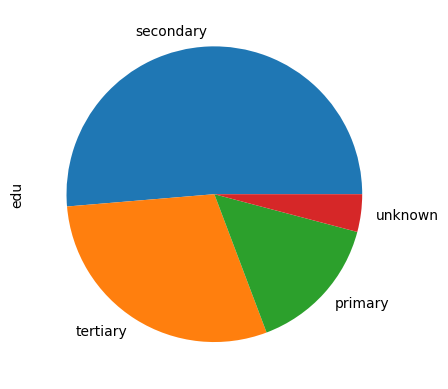

In [116]:
education.plot.pie()
plt.show()

In [117]:
#calculate the percentage of each poutcome category.
poutcome=df.poutcome.value_counts(normalize=True)*100
poutcome  

unknown    81.751954
failure    10.836784
other       4.072098
success     3.339164
Name: poutcome, dtype: float64

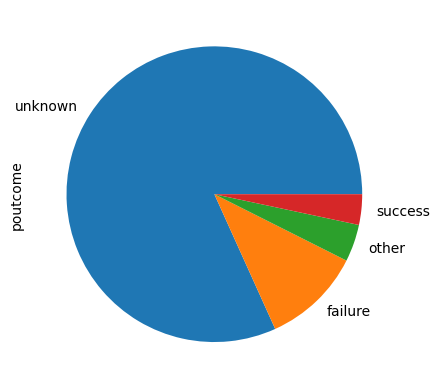

In [118]:
poutcome.plot.pie()
plt.show()

In [126]:
poutcometarget=df[~(df.poutcome=='unknown')].poutcome.value_counts(normalize=True)*100
poutcometarget

failure    59.385997
other      22.315253
success    18.298750
Name: poutcome, dtype: float64

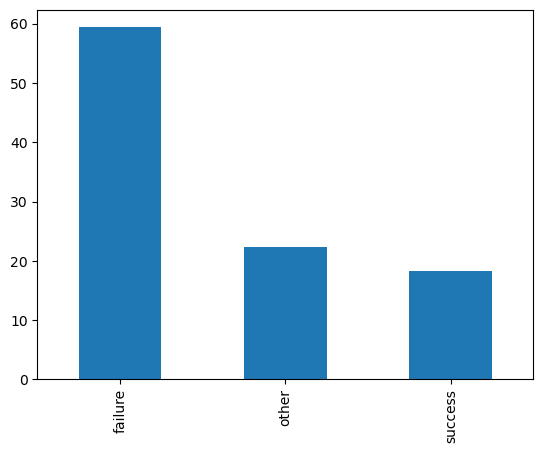

In [127]:
poutcometarget.plot.bar()
plt.show()

### Response the target variable¶

In [128]:
#calculate the percentage of each response category.
response=df.response.value_counts(normalize=True)*100
response

no     76.932411
yes    23.067589
Name: response, dtype: float64

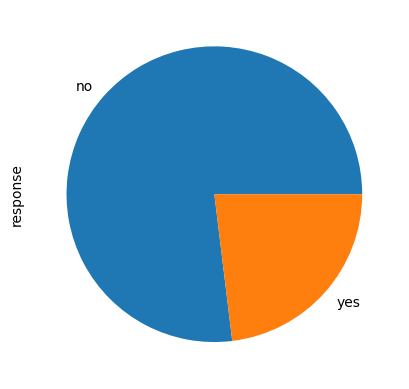

In [129]:
response.plot.pie()
plt.show()

### , Bivariate and Multivariate Analysis

### Numeric- numeric analysis

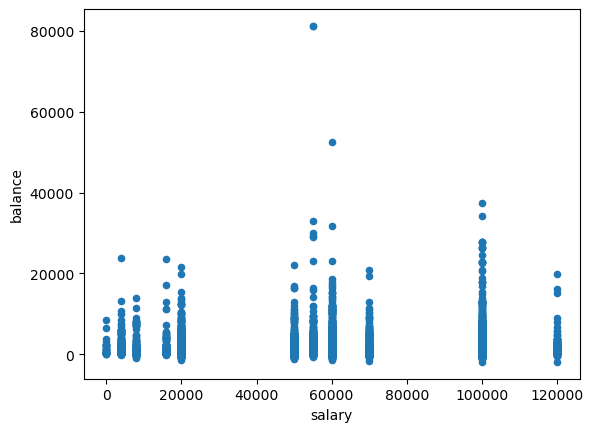

In [130]:
#plot the scatter plot of balance and salary variable in inp0
df.plot.scatter(x='salary',y='balance')
plt.show()

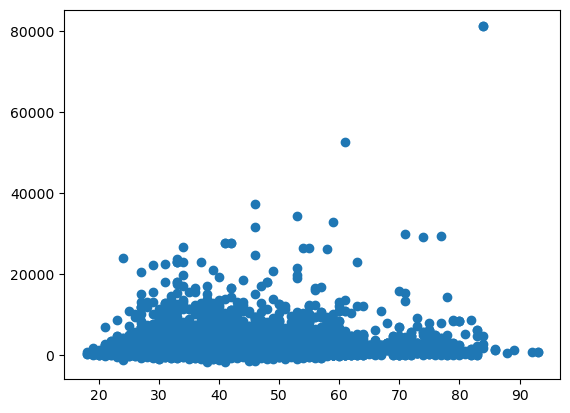

In [131]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(df.age,df.balance)
plt.show()

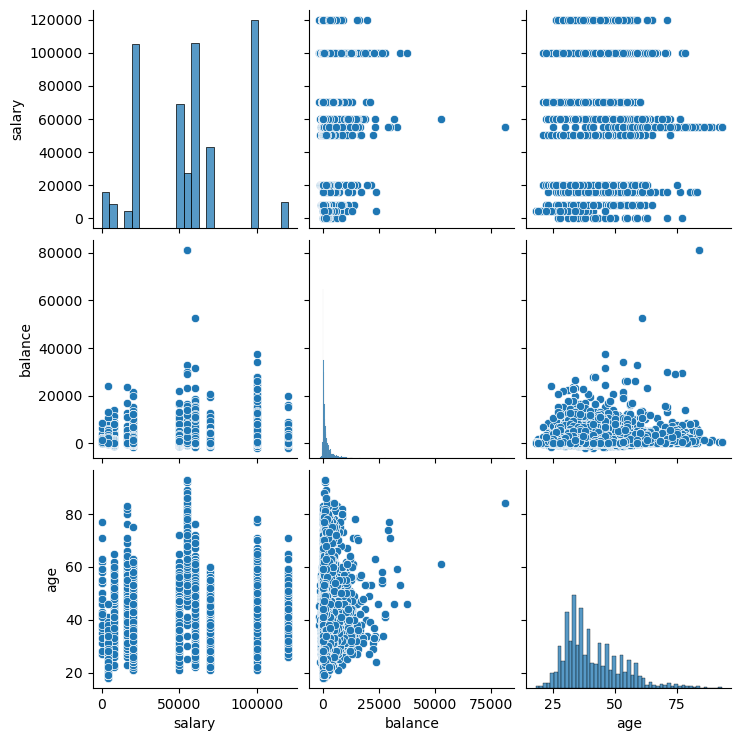

In [132]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=df,vars=['salary','balance','age'])
plt.show()

In [133]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
df[['salary','balance','age']].corr()

,salary,balance,age
salary,1.000000,0.066091,0.058613
balance,0.066091,1.000000,0.115236
age,0.058613,0.115236,1.000000


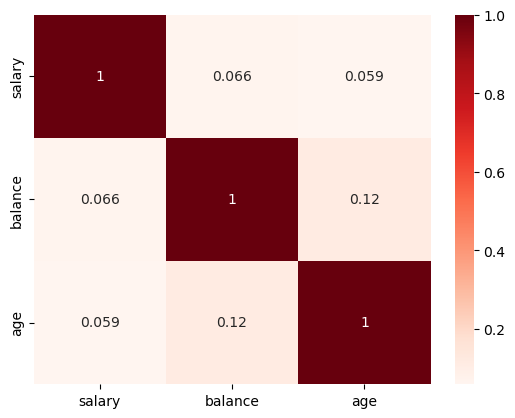

In [134]:
sns.heatmap(df[['salary','balance','age']].corr(),annot=True,cmap='Reds')

plt.show()

###  Numerical categorical variable

### Salary vs response

In [135]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
df.groupby("response")["salary"].mean()

response
no     56903.785489
yes    59731.720147
Name: salary, dtype: float64

In [136]:
#groupby the response to find the median of the salary with response no & yes seperatly.
df.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

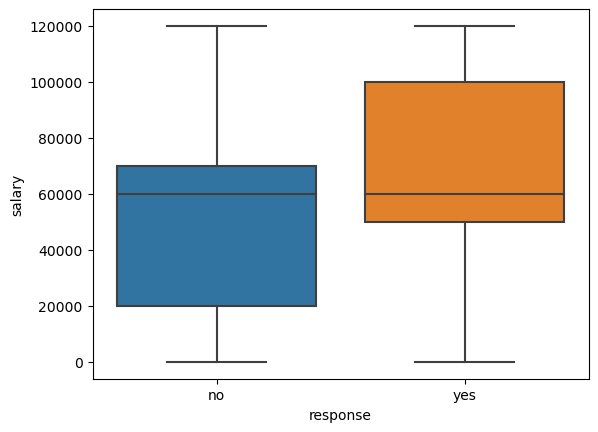

In [137]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=df,x='response',y='salary')
plt.show()

### Balance vs response

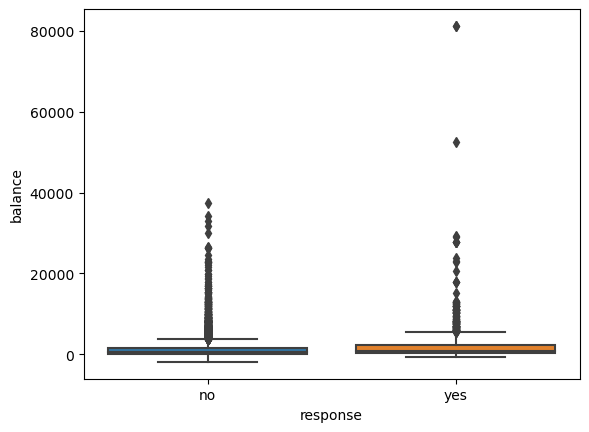

In [138]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=df,x='response',y='balance')
plt.show()

In [139]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
df.groupby("response")['balance'].mean()

response
no     1429.296057
yes    1987.193056
Name: balance, dtype: float64

In [141]:
#groupby the response to find the median of the balance with response no & yes seperatly.
df.groupby("response")['balance'].median()

response
no     543.0
yes    883.0
Name: balance, dtype: float64

In [142]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [144]:
#calculate the mean, median and 75th percentile of balance with response
df.groupby("response")['balance'].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1429.296057,543.0,1554.0
yes,1987.193056,883.0,2353.0


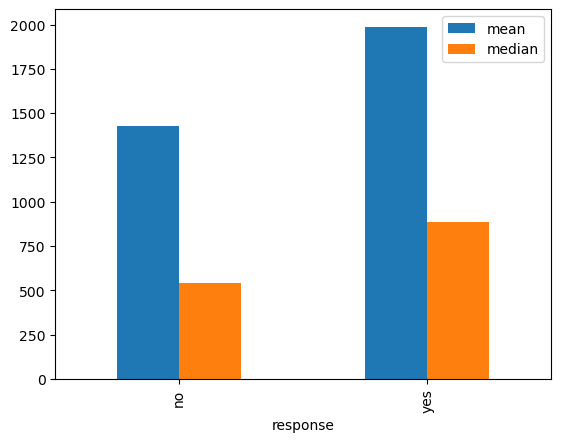

In [145]:
#plot the bar graph of balance's mean an median with response.
df.groupby("response")['balance'].aggregate(["mean","median"]).plot.bar()
plt.show()

### Education vs salary

In [147]:
#groupby the education to find the mean of the salary education category.
df.groupby("edu")["salary"].mean()

edu
primary      35642.787046
secondary    48560.160113
tertiary     81323.529412
unknown      49829.721362
Name: salary, dtype: float64

In [148]:
#groupby the education to find the median of the salary for each education category.
df.groupby("edu")["salary"].median()

edu
primary       20000.0
secondary     50000.0
tertiary     100000.0
unknown       55000.0
Name: salary, dtype: float64

In [149]:
#groupby the job to find the mean of the salary for each job category.
df.groupby("job")["salary"].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Categorical categorical variable

In [150]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
df['response_flag']=np.where(df.response=='yes',1,0)
df.response_flag.value_counts()

0    6340
1    1901
Name: response_flag, dtype: int64

### Education vs response rate¶

In [152]:
#calculate the mean of response_flag with different education categories.
df.groupby("edu")["response_flag"].mean()

edu
primary      0.169774
secondary    0.200848
tertiary     0.293741
unknown      0.297214
Name: response_flag, dtype: float64

### Marital vs response rate

In [153]:
#calculate the mean of response_flag with different marital status categories.
df.groupby("marital")["response_flag"].mean()

marital
divorced    0.197198
married     0.221237
single      0.260093
Name: response_flag, dtype: float64

<Axes: ylabel='marital'>

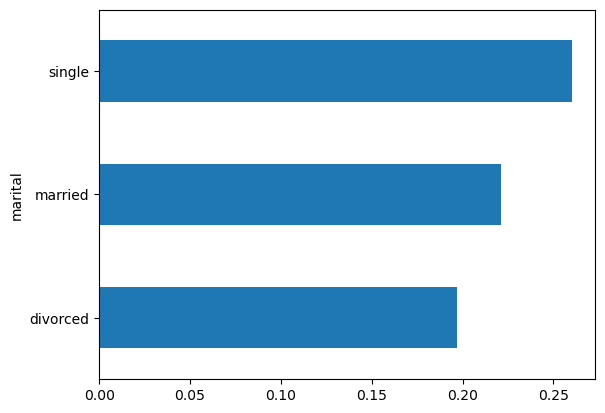

In [154]:
#plot the bar graph of marital status with average value of response_flag
(df.groupby("marital")["response_flag"].mean()).plot.barh()

### Loans vs response rate

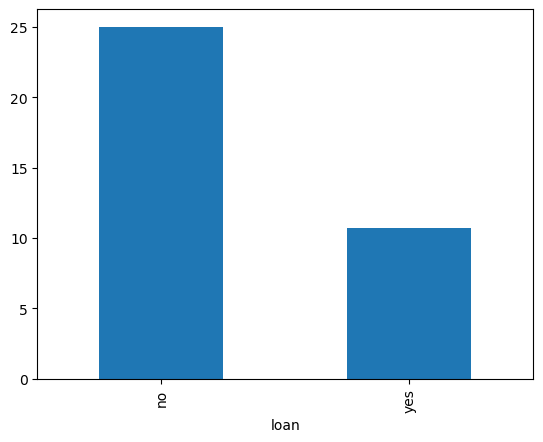

In [155]:
#plot the bar graph of personal loan status with average value of response_flag
(df.groupby("loan")["response_flag"].mean()*100).plot.bar()
plt.show()

### Age vs response

<Axes: xlabel='response_flag', ylabel='age'>

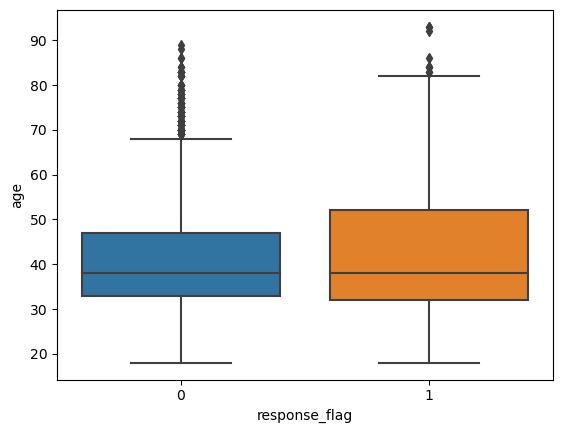

In [156]:
#plot the boxplot of age with response_flag
sns.boxplot(data=df,x='response_flag',y='age')

### making buckets from age columns

In [157]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
df["age_group"]= pd.cut(df.age,[0,30,40,50,60,120],labels=["<30", "30-40", "40-50","50-60","60+"])

In [158]:
df["age_group"]

24060    30-40
24062    40-50
24064    30-40
24072    30-40
24077    30-40
         ...  
45199    30-40
45201    50-60
45204      60+
45208      60+
45210    30-40
Name: age_group, Length: 8241, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

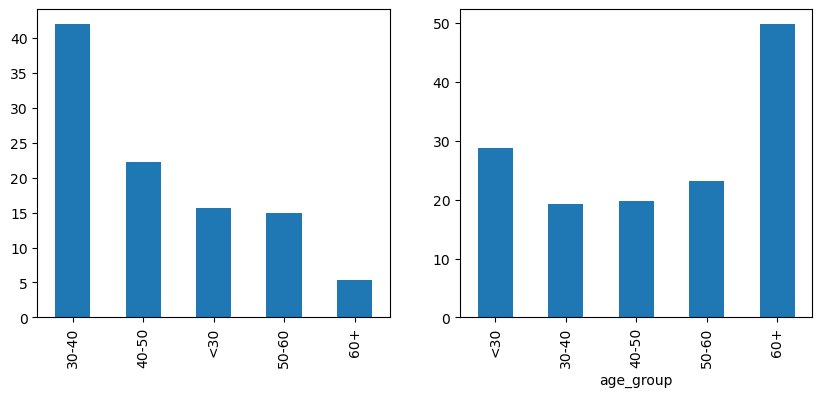

In [159]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
(df.age_group.value_counts(normalize=True)*100).plot.bar()
plt.subplot(1,2,2)
(df.groupby(['age_group'])['response_flag'].mean()*100).plot.bar()
plt.show()

##  Multivariate analysis

## Education vs marital vs response¶


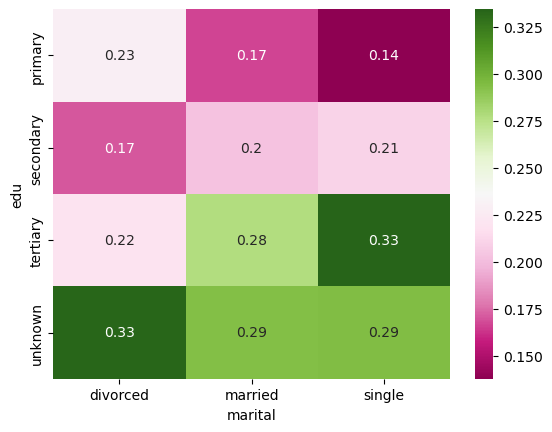

In [160]:
#create heat map of education vs marital vs response_flag

ax=pd.pivot_table(data=df,index="edu",columns='marital',values='response_flag')
sns.heatmap(ax,annot=True,cmap='PiYG')
plt.show()

## Job vs marital vs response

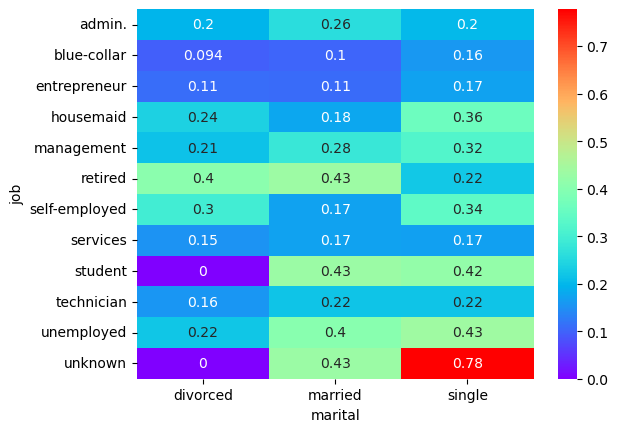

In [161]:
#create the heat map of Job vs marital vs response_flag.
ax=pd.pivot_table(data=df,index='job',columns='marital',values='response_flag')
sns.heatmap(ax,annot=True,cmap='rainbow')
plt.show()

## Education vs poutcome vs response

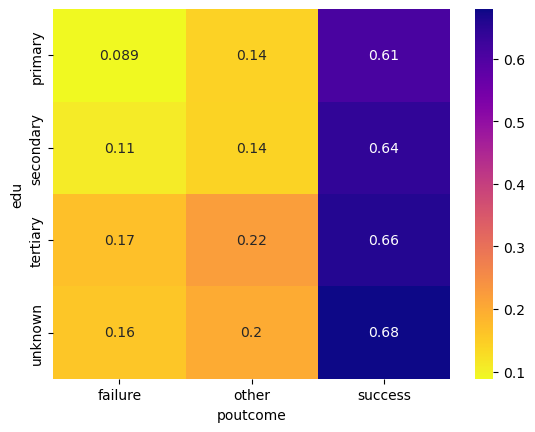

In [163]:
#create the heat map of education vs poutcome vs response_flag.
ax=pd.pivot_table(data=df,index='edu',columns='poutcome',values='response_flag')
sns.heatmap(ax,annot=True,cmap='plasma_r')
plt.show()